In [20]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn

In [28]:
import pathlib
from torch.optim import Adam
import glob
from torch.autograd import Variable

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from torchvision.datasets import ImageFolder
import torchvision.transforms as transform
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Subset
torch.utils.data.Dataset
import torchvision
import pathlib
from torch.optim import Adam
import glob
from torch.autograd import Variable

In [3]:
# download Training data
train_data = datasets.FashionMNIST(
    root      = "data",
    train     = True,       # for Training data
    download  = True,
    transform = ToTensor()  # for converting to tensor
    )


100%|█████████████████████████████████████████████████████████████████| 26421880/26421880 [00:07<00:00, 3512065.39it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 210516.18it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|███████████████████████████████████████████████████████████████████| 4422102/4422102 [00:01<00:00, 2857904.05it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [4]:
len(train_data)

60000

In [6]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [8]:
np.unique(train_data.targets)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [9]:
# download Test data
test_data = datasets.FashionMNIST(
    root      = "data",
    train     = False,      # for Test data
    download  = True,
    transform = ToTensor()  # for converting to tensor
    )

In [10]:
len(test_data)

10000

In [11]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [12]:
np.unique(test_data.targets)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [13]:
train_dataloader=DataLoader(dataset=train_data,batch_size=64)

In [14]:
test_dataloader=DataLoader(dataset=test_data,batch_size=64)

In [16]:
print(len(train_dataloader.dataset),len(test_dataloader.dataset))

60000 10000


In [18]:
len(train_dataloader)

938

In [ ]:
# 🚨 BUT the dataloader ITSELF is a bit DIFFERENT
# len(train_dataloader) # 938 (as OPPOSED to 60K)

# remember we set our batch size to 64 (`batch_size = 64`) above
# if we multiply 64 by 938 
# 938 * 64 # 60032            <-- which is roughly 60K 🔥
# so DataLoader has divided 60K into 938 "groups"


In [34]:
class NeuralNetwork(nn.Module): # inherit from nn.Module
    
    def __init__(self):
        '''
        define the layers of the network in the __init__ function
        '''
        super().__init__()     # super() to inherit methods from nn.Module
        
        # Flattening
        self.flatten = nn.Flatten()
        
        # Architecture
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(in_features  = 28*28, # apply linear transformation
                      out_features = 512),
            nn.ReLU(),                      # apply rectified linear unit
            nn.Linear(in_features  = 512,   #       linear transformation
                      out_features = 512),
            nn.ReLU(),                      #       rectified linear unit
            nn.Linear(in_features  = 512,   #       linear transformation
                      out_features = 10)
            )
            
    def forward(self, x):
        '''
        specify how data pass through the network in the forward function
        using self.flatten() & self.linear_relu_stack() from __init__
        '''
        
        # flattening to get the correct in_features
        x = self.flatten(x)
        
        # Stacking Linear ReLU layers
        network = self.linear_relu_stack(x)
        return network


In [35]:
# check architecture
simpleNN = NeuralNetwork()
simpleNN   # notice flatten & linear_relu_stack created from above


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [36]:
# Loss
loss_func = nn.CrossEntropyLoss()
# use CrossEntropy since this is 10-label classification problem

# Optimizer
opt = torch.optim.SGD(              # stochastic gradient descent
    params = simpleNN.parameters(), # simpleNN parameters to optimize
    lr     = 1e-3                   # learning rate 
    )


In [37]:
def training(dataloader, model, loss_func, optimizer):
    '''
    train simpleNN, while monitoring Loss
    '''
    
    size = len(dataloader.dataset) # 60K since there are 60K Training samples
    
    # Sets the module in training mode
    model.train()
    
    for batch, (x, y) in enumerate(dataloader): # training 1 batch at a time
        
        # Compute loss
        pred = model(x)           # simpleNN prediction 
        loss = loss_func(pred, y) # Loss calculation 
        
        
        # Backpropagation to adjust model's parameters
        optimizer.zero_grad() # zero out gradients in each loop
        loss.backward()       # computes gradient in reverse direction
        optimizer.step()      # conduct a single optimization step
        
        
        # Monitor for decrease in Loss as training progresses
        if batch % 100 == 0:
            loss    = loss.item()     # Loss
            current = batch * len(x)  # Progress
            print(f"loss: {loss:>5f} at {current:>5d}/{size:>5d}")


















# =============================================================================
# Test function   -  evaluate model against Test data
# =============================================================================
        
def testing(dataloader, model, loss_func):
    '''
    Evaluate simpleNN with Test data at the end of each epoch by
    monitoring the changes in Accuracy & Loss
    '''
    
    size = len(dataloader.dataset) # 10K, since there are 10K test samples
    num_batch = len(dataloader)    # 157 = len(test_dataloader)
    
    # sets the module in evaluation mode
    model.eval()
    
    # initialize monitoring values (starting from 0)
    test_loss, correct  = 0, 0
    
    with torch.no_grad(): # no_grad() to disable gradient calculation
        for x, y in dataloader:
            # prediction with simpleNN
            pred       = model(x) 
            
            # accumulate Loss and number of correct prediction
            test_loss += loss_func(pred, y).item()
            correct   += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    
    # updated monitoring value
    test_loss /= num_batch  # Average Loss
    correct   /= size       # Accuracy
    
    print(f"\n Test Evaluation: \n Accuracy: {(100*correct):>5f}%,\
    Avg loss: {test_loss:>5f} \n")


In [39]:
# number of epochs
epochs = 10

# train model & evaluate
for t in range(epochs):
    print(f"\n\n   Epoch {t+1}  -------------------- \n")
    
    # training
    training(train_dataloader, simpleNN, loss_func, opt)
    
    # testing
    testing(test_dataloader, simpleNN, loss_func)




   Epoch 1  -------------------- 

loss: 1.153205 at     0/60000
loss: 1.154134 at  6400/60000
loss: 0.974493 at 12800/60000
loss: 1.100319 at 19200/60000
loss: 0.977126 at 25600/60000
loss: 1.004158 at 32000/60000
loss: 1.046731 at 38400/60000
loss: 0.986350 at 44800/60000
loss: 1.032409 at 51200/60000
loss: 0.965325 at 57600/60000

 Test Evaluation: 
 Accuracy: 65.520000%,    Avg loss: 0.977327 



   Epoch 2  -------------------- 

loss: 1.038023 at     0/60000
loss: 1.059288 at  6400/60000
loss: 0.863101 at 12800/60000
loss: 1.009401 at 19200/60000
loss: 0.888641 at 25600/60000
loss: 0.911642 at 32000/60000
loss: 0.971579 at 38400/60000
loss: 0.914287 at 44800/60000
loss: 0.956733 at 51200/60000
loss: 0.900062 at 57600/60000

 Test Evaluation: 
 Accuracy: 66.740000%,    Avg loss: 0.906435 



   Epoch 3  -------------------- 

loss: 0.953495 at     0/60000
loss: 0.993776 at  6400/60000
loss: 0.783386 at 12800/60000
loss: 0.945349 at 19200/60000
loss: 0.830241 at 25600/60000
loss:

Prediction: Ankle boot
True label: Ankle boot

Prediction: Pullover
True label: Pullover

Prediction: Trouser
True label: Trouser

Prediction: Trouser
True label: Trouser

Prediction: Shirt
True label: Shirt

Prediction: Trouser
True label: Trouser

Prediction: Shirt
True label: Coat

Prediction: Coat
True label: Shirt

Prediction: Sneaker
True label: Sandal

Prediction: Sneaker
True label: Sneaker

Prediction: Coat
True label: Coat

Prediction: Sandal
True label: Sandal

Prediction: Sandal
True label: Sneaker

Prediction: Dress
True label: Dress

Prediction: Coat
True label: Coat

Prediction: Trouser
True label: Trouser

Prediction: Pullover
True label: Pullover

Prediction: Pullover
True label: Coat

Prediction: Bag
True label: Bag

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Shirt
True label: Pullover

Prediction: Sneaker
True label: Sandal

Prediction: Sneaker
True label: Sneaker

Prediction: Sneaker
True label: Ankle boot

Prediction: Trouser
True label: Trouser



Prediction: Sneaker
True label: Sneaker

Prediction: Sneaker
True label: Sneaker

Prediction: Sneaker
True label: Sneaker

Prediction: Dress
True label: Dress

Prediction: Dress
True label: Dress

Prediction: Sneaker
True label: Sneaker

Prediction: Shirt
True label: T-shirt/top

Prediction: Sneaker
True label: Sneaker

Prediction: Trouser
True label: Trouser

Prediction: Dress
True label: Dress

Prediction: Sneaker
True label: Sneaker

Prediction: Shirt
True label: Pullover

Prediction: Pullover
True label: Pullover

Prediction: Dress
True label: Dress

Prediction: Coat
True label: Coat

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Dress
True label: Dress

Prediction: Trouser
True label: Trouser

Prediction: T-shirt/top
True label: Shirt

Prediction: Trouser
True label: Trouser

Prediction: Ankle boot
True label: Ankle boot

Prediction: Coat
True label: Coat

Prediction: Ankle boot
True label: Ankle boot

Prediction: Ankle boot
True label: Ankle boot

Prediction: Trous

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Coat
True label: Coat

Prediction: Dress
True label: T-shirt/top

Prediction: Bag
True label: Bag

Prediction: Sandal
True label: Sandal

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Bag
True label: Bag

Prediction: Pullover
True label: Pullover

Prediction: Ankle boot
True label: Ankle boot

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Bag
True label: Bag

Prediction: Ankle boot
True label: Ankle boot

Prediction: T-shirt/top
True label: Shirt

Prediction: Dress
True label: Coat

Prediction: Coat
True label: Pullover

Prediction: Ankle boot
True label: Ankle boot

Prediction: Shirt
True label: Dress

Prediction: Coat
True label: Coat

Prediction: Sandal
True label: Sandal

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Ankle boot
True label: Ankle boot

Prediction: Sandal
True label: Sandal

Prediction: Dress
True label: Dress

Prediction: Coat
True label: Shirt

Prediction: Coat

Prediction: Dress
True label: Dress

Prediction: Sneaker
True label: Sandal

Prediction: Pullover
True label: Coat

Prediction: Ankle boot
True label: Ankle boot

Prediction: Dress
True label: Dress

Prediction: Pullover
True label: Coat

Prediction: Sneaker
True label: Sneaker

Prediction: Sneaker
True label: Sneaker

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Dress
True label: Dress

Prediction: Ankle boot
True label: Sandal

Prediction: Sandal
True label: Sandal

Prediction: Pullover
True label: Shirt

Prediction: Coat
True label: T-shirt/top

Prediction: Sneaker
True label: Sandal

Prediction: Ankle boot
True label: Ankle boot

Prediction: Pullover
True label: Shirt

Prediction: Dress
True label: Dress

Prediction: Sneaker
True label: Sneaker

Prediction: Sandal
True label: Sandal

Prediction: Trouser
True label: Trouser

Prediction: Ankle boot
True label: Ankle boot

Prediction: Bag
True label: Bag

Prediction: Bag
True label: Bag

Prediction: Ankle boot
True lab

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Coat
True label: Shirt

Prediction: Ankle boot
True label: Sandal

Prediction: Trouser
True label: Trouser

Prediction: Shirt
True label: Shirt

Prediction: Sneaker
True label: Sneaker

Prediction: Dress
True label: Dress

Prediction: Coat
True label: Coat

Prediction: Bag
True label: Bag

Prediction: Bag
True label: Bag

Prediction: Pullover
True label: Pullover

Prediction: Bag
True label: Bag

Prediction: Ankle boot
True label: Ankle boot

Prediction: Coat
True label: Coat

Prediction: T-shirt/top
True label: Trouser

Prediction: Coat
True label: Shirt

Prediction: Sandal
True label: Sandal

Prediction: Coat
True label: Pullover

Prediction: Sneaker
True label: Sneaker

Prediction: Bag
True label: Bag

Prediction: Sandal
True label: Sandal

Prediction: Shirt
True label: Dress

Prediction: Bag
True label: Bag

Prediction: Sandal
True label: Sandal

Prediction: Coat
True label: Coat

Prediction: Shirt
True label: Pullover

P

Prediction: Sneaker
True label: Sneaker

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Trouser
True label: Trouser

Prediction: Dress
True label: Dress

Prediction: Ankle boot
True label: Ankle boot

Prediction: Coat
True label: Shirt

Prediction: Dress
True label: Dress

Prediction: Sneaker
True label: Sneaker

Prediction: Shirt
True label: Pullover

Prediction: Bag
True label: Bag

Prediction: Trouser
True label: Trouser

Prediction: Bag
True label: Bag

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Sneaker
True label: Sneaker

Prediction: Ankle boot
True label: Ankle boot

Prediction: Bag
True label: Bag

Prediction: Sandal
True label: Sandal

Prediction: Bag
True label: Bag

Prediction: Pullover
True label: Pullover

Prediction: T-shirt/top
True label: Shirt

Prediction: Coat
True label: Coat

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Coat
True label: Shirt

Prediction: Sandal
True label: Sandal

Prediction: Bag
True label: Bag

Pred

Prediction: Ankle boot
True label: Ankle boot

Prediction: Ankle boot
True label: Ankle boot

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Shirt
True label: Dress

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Bag
True label: Bag

Prediction: Shirt
True label: Dress

Prediction: Bag
True label: Bag

Prediction: Bag
True label: Bag

Prediction: Pullover
True label: Coat

Prediction: Pullover
True label: Coat

Prediction: Trouser
True label: Trouser

Prediction: Bag
True label: Bag

Prediction: Coat
True label: Pullover

Prediction: Bag
True label: Dress

Prediction: Sandal
True label: Sandal

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Pullover
True label: Coat

Prediction: Coat
True label: Coat

Prediction: Dress
True label: Dress

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Trouser
True label: Trouser

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Bag
True l

Prediction: Dress
True label: Dress

Prediction: Dress
True label: Dress

Prediction: T-shirt/top
True label: Shirt

Prediction: Ankle boot
True label: Ankle boot

Prediction: Bag
True label: Bag

Prediction: Coat
True label: Coat

Prediction: Coat
True label: Pullover

Prediction: Shirt
True label: Pullover

Prediction: Trouser
True label: Dress

Prediction: Ankle boot
True label: Ankle boot

Prediction: Coat
True label: Coat

Prediction: Dress
True label: Dress

Prediction: Pullover
True label: Shirt

Prediction: Sneaker
True label: Sneaker

Prediction: Coat
True label: Dress

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Dress
True label: Coat

Prediction: Bag
True label: Bag

Prediction: Trouser
True label: Trouser

Prediction: Bag
True label: Bag

Prediction: Sneaker
True label: Sneaker

Prediction: Dress
True label: Dress

Prediction: Pullover
True label: Coat

Prediction: Sneaker
True label: Sandal

Prediction: Coat
True label: Pullover

Prediction: Pullover
True 

Prediction: Bag
True label: Bag

Prediction: Ankle boot
True label: Ankle boot

Prediction: Dress
True label: Dress

Prediction: Sandal
True label: Sandal

Prediction: Pullover
True label: Shirt

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Coat
True label: Coat

Prediction: Shirt
True label: Coat

Prediction: Sneaker
True label: Sneaker

Prediction: Bag
True label: Bag

Prediction: Ankle boot
True label: Ankle boot

Prediction: Trouser
True label: Trouser

Prediction: Bag
True label: Bag

Prediction: Shirt
True label: Pullover

Prediction: Ankle boot
True label: Sandal

Prediction: Sandal
True label: Sandal

Prediction: Dress
True label: Dress

Prediction: Trouser
True label: Trouser

Prediction: Trouser
True label: Trouser

Prediction: Bag
True label: Bag

Prediction: Bag
True label: Bag

Prediction: Dress
True label: Dress

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Sneaker
True label: Sneaker

Prediction: T-shirt/top
True label: T-shirt/top

Predic

Prediction: Ankle boot
True label: Sneaker

Prediction: Trouser
True label: Trouser

Prediction: Dress
True label: T-shirt/top

Prediction: Sandal
True label: Sandal

Prediction: Bag
True label: T-shirt/top

Prediction: Sandal
True label: Sneaker

Prediction: Pullover
True label: Pullover

Prediction: Bag
True label: Bag

Prediction: Shirt
True label: Shirt

Prediction: Dress
True label: Dress

Prediction: Shirt
True label: Shirt

Prediction: Trouser
True label: Trouser

Prediction: Sneaker
True label: Sneaker

Prediction: Coat
True label: Coat

Prediction: Bag
True label: Bag

Prediction: Sneaker
True label: Sneaker

Prediction: Pullover
True label: Coat

Prediction: Trouser
True label: Trouser

Prediction: Sneaker
True label: Sneaker

Prediction: Bag
True label: Bag

Prediction: Shirt
True label: Pullover

Prediction: Coat
True label: Coat

Prediction: Bag
True label: Coat

Prediction: Coat
True label: Coat

Prediction: Coat
True label: Coat

Prediction: Trouser
True label: Trouser



Prediction: Sandal
True label: Sandal

Prediction: Bag
True label: Bag

Prediction: Trouser
True label: Trouser

Prediction: Trouser
True label: Trouser

Prediction: Pullover
True label: Pullover

Prediction: Shirt
True label: Shirt

Prediction: T-shirt/top
True label: Shirt

Prediction: T-shirt/top
True label: Shirt

Prediction: Bag
True label: Bag

Prediction: Coat
True label: Shirt

Prediction: Pullover
True label: Shirt

Prediction: Dress
True label: Dress

Prediction: Dress
True label: Dress

Prediction: Ankle boot
True label: Ankle boot

Prediction: Sneaker
True label: Sandal

Prediction: Coat
True label: Coat

Prediction: Shirt
True label: Dress

Prediction: Dress
True label: Dress

Prediction: Trouser
True label: Trouser

Prediction: Bag
True label: Bag

Prediction: Trouser
True label: Trouser

Prediction: Sandal
True label: Sandal

Prediction: Pullover
True label: Pullover

Prediction: T-shirt/top
True label: Shirt

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: 

Prediction: Trouser
True label: Trouser

Prediction: Ankle boot
True label: Sandal

Prediction: Bag
True label: Bag

Prediction: Trouser
True label: Trouser

Prediction: Sandal
True label: Sandal

Prediction: Bag
True label: Bag

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Sneaker
True label: Sneaker

Prediction: Ankle boot
True label: Bag

Prediction: Sandal
True label: Sneaker

Prediction: Ankle boot
True label: Sandal

Prediction: Dress
True label: Ankle boot

Prediction: Ankle boot
True label: Sandal

Prediction: Sandal
True label: Sandal

Prediction: Dress
True label: Dress

Prediction: Shirt
True label: T-shirt/top

Prediction: Sneaker
True label: Sneaker

Prediction: Bag
True label: Bag

Prediction: Coat
True label: Coat

Prediction: Sneaker
True label: Sandal

Prediction: Trouser
True label: Trouser

Prediction: T-shirt/top
True label: Shirt

Prediction: Shirt
True label: Coat

Prediction: Shirt
True label: Pullover

Prediction: Coat
True label: Coat

Predictio

Prediction: Shirt
True label: T-shirt/top

Prediction: Sandal
True label: Sandal

Prediction: Bag
True label: Bag

Prediction: Bag
True label: Bag

Prediction: Bag
True label: Bag

Prediction: Coat
True label: Shirt

Prediction: Trouser
True label: Trouser

Prediction: Bag
True label: T-shirt/top

Prediction: Bag
True label: Bag

Prediction: Ankle boot
True label: Sneaker

Prediction: Bag
True label: Bag

Prediction: Sandal
True label: Sandal

Prediction: Bag
True label: Bag

Prediction: Sneaker
True label: Sneaker

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Sneaker
True label: Sneaker

Prediction: Pullover
True label: Pullover

Prediction: Sneaker
True label: Sneaker

Prediction: Dress
True label: Trouser

Prediction: Sandal
True label: Sandal

Prediction: Sandal
True label: Sandal

Prediction: Bag
True label: Bag

Prediction: Dress
True label: Dress

Prediction: Shirt
True label: Pullover

Prediction: Bag
True label: Bag

Prediction: Sandal
True label: Sandal

Predi

Prediction: Sneaker
True label: Sneaker

Prediction: Dress
True label: Dress

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: T-shirt/top
True label: Pullover

Prediction: Shirt
True label: Pullover

Prediction: Sandal
True label: Sandal

Prediction: Pullover
True label: Pullover

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Sneaker
True label: Sneaker

Prediction: Sneaker
True label: Sneaker

Prediction: Sneaker
True label: Sneaker

Prediction: Trouser
True label: Trouser

Prediction: Sneaker
True label: Sandal

Prediction: Pullover
True label: Pullover

Prediction: Trouser
True label: Trouser

Prediction: Bag
True label: Bag

Prediction: Sandal
True label: Sandal

Prediction: Pullover
True label: Pullover

Prediction: Pullover
True label: Coat

Prediction: Bag
True label: Bag

Prediction: Sneaker
True label: Sneaker

Prediction: Sneaker
True label: Sneaker

Prediction: Pullover
True label: Shirt

Prediction: Sneaker
True label: Sneaker

Prediction: Trouse

Prediction: Sandal
True label: Sandal

Prediction: Bag
True label: Bag

Prediction: Bag
True label: Bag

Prediction: Coat
True label: Pullover

Prediction: Coat
True label: Coat

Prediction: Sneaker
True label: Sneaker

Prediction: Sneaker
True label: Sneaker

Prediction: Coat
True label: Coat

Prediction: Coat
True label: Shirt

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Sandal
True label: Sandal

Prediction: Sandal
True label: Sandal

Prediction: Dress
True label: Pullover

Prediction: Bag
True label: Shirt

Prediction: Pullover
True label: Pullover

Prediction: Sneaker
True label: Sandal

Prediction: Coat
True label: Shirt

Prediction: Bag
True label: Bag

Prediction: Sandal
True label: Sandal

Prediction: Pullover
True label: Shirt

Prediction: Ankle boot
True label: Ankle boot

Prediction: Trouser
True label: Trouser

Prediction: Dress
True label: Dress

Prediction: Trouser
True label: Trouser

Prediction: Pullover
True label: Coat

Prediction: Sandal
True label:

Prediction: Dress
True label: Dress

Prediction: Coat
True label: Coat

Prediction: Pullover
True label: Pullover

Prediction: Trouser
True label: Trouser

Prediction: Pullover
True label: Pullover

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Dress
True label: Dress

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Bag
True label: Bag

Prediction: Sandal
True label: Sandal

Prediction: Trouser
True label: Trouser

Prediction: Sandal
True label: Sandal

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Pullover
True label: Pullover

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Dress
True label: Dress

Prediction: Ankle boot
True label: Ankle boot

Prediction: Bag
True label: Bag

Prediction: Shirt
True label: Pullover

Prediction: T-shirt/top
True label: Bag

Prediction: Trouser
True label: Trouser

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Pullover
True label: Pullover

Prediction: Shirt
True label: Shirt

Predi

Prediction: Ankle boot
True label: Ankle boot

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Trouser
True label: Trouser

Prediction: Coat
True label: Coat

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Sneaker
True label: Sneaker

Prediction: Ankle boot
True label: Ankle boot

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Trouser
True label: Trouser

Prediction: Dress
True label: Dress

Prediction: Ankle boot
True label: Ankle boot

Prediction: Sandal
True label: Sandal

Prediction: Trouser
True label: Trouser

Prediction: Pullover
True label: Coat

Prediction: Trouser
True label: Trouser

Prediction: Trouser
True label: Trouser

Prediction: Dress
True label: Coat

Prediction: Bag
True label: Bag

Prediction: T-shirt/top
True label: Dress

Prediction: Ankle boot
True label: Ankle boot

Prediction: Sandal
True label: Sandal

Prediction: Coat
True label: Coat

Prediction: Coat
True label: Coat

Prediction: Dress
True label: Dress

Prediction:

Prediction: Trouser
True label: Trouser

Prediction: Coat
True label: Coat

Prediction: T-shirt/top
True label: Shirt

Prediction: Sandal
True label: Sandal

Prediction: Coat
True label: Coat

Prediction: Bag
True label: Bag

Prediction: Sneaker
True label: Sandal

Prediction: Sneaker
True label: Sneaker

Prediction: Dress
True label: Dress

Prediction: Shirt
True label: T-shirt/top

Prediction: Bag
True label: Bag

Prediction: Dress
True label: Dress

Prediction: Sneaker
True label: Sandal

Prediction: Coat
True label: Pullover

Prediction: Pullover
True label: Coat

Prediction: Ankle boot
True label: Ankle boot

Prediction: Bag
True label: Bag

Prediction: Ankle boot
True label: Sandal

Prediction: Sandal
True label: Ankle boot

Prediction: Bag
True label: Bag

Prediction: Trouser
True label: Trouser

Prediction: Ankle boot
True label: Ankle boot

Prediction: Sandal
True label: Sandal

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Trouser
True label: Trouser

Predictio

Prediction: Pullover
True label: Coat

Prediction: Coat
True label: Coat

Prediction: Shirt
True label: Dress

Prediction: Dress
True label: Dress

Prediction: Sneaker
True label: Sandal

Prediction: Ankle boot
True label: Sneaker

Prediction: Sneaker
True label: Sneaker

Prediction: Bag
True label: Bag

Prediction: Sandal
True label: Sandal

Prediction: Shirt
True label: Shirt

Prediction: Dress
True label: Dress

Prediction: Pullover
True label: Pullover

Prediction: Trouser
True label: Trouser

Prediction: Bag
True label: Bag

Prediction: Dress
True label: Dress

Prediction: Pullover
True label: Bag

Prediction: Sneaker
True label: Sandal

Prediction: Coat
True label: Coat

Prediction: Pullover
True label: Pullover

Prediction: Dress
True label: Dress

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Bag
True label: Bag

Prediction: Dress
True label: Dress

Prediction: Dress
True label: Dress

Prediction: Coat
True label: Pullover

Prediction: Ankle boot
True label: Ankl

Prediction: Trouser
True label: Trouser

Prediction: Ankle boot
True label: Ankle boot

Prediction: Coat
True label: Coat

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Coat
True label: Coat

Prediction: Pullover
True label: Pullover

Prediction: Trouser
True label: Trouser

Prediction: Coat
True label: Shirt

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Trouser
True label: Trouser

Prediction: Pullover
True label: Shirt

Prediction: Ankle boot
True label: Sandal

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Bag
True label: Bag

Prediction: Trouser
True label: Trouser

Prediction: Trouser
True label: Trouser

Prediction: Sneaker
True label: Sneaker

Prediction: Bag
True label: Sandal

Prediction: Pullover
True label: Pullover

Prediction: Sandal
True label: Sandal

Prediction: Ankle boot
True label: Ankle boot

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Bag
True label: Bag

Prediction: Dress
True label: Dress

Prediction:

Prediction: Trouser
True label: Trouser

Prediction: Ankle boot
True label: Ankle boot

Prediction: T-shirt/top
True label: Dress

Prediction: Sneaker
True label: Sneaker

Prediction: Pullover
True label: Pullover

Prediction: Sneaker
True label: Sneaker

Prediction: Coat
True label: Coat

Prediction: Shirt
True label: Pullover

Prediction: Ankle boot
True label: Ankle boot

Prediction: Sneaker
True label: Sneaker

Prediction: Coat
True label: Coat

Prediction: Coat
True label: Shirt

Prediction: T-shirt/top
True label: Shirt

Prediction: Trouser
True label: Trouser

Prediction: Sneaker
True label: Sneaker

Prediction: Trouser
True label: Trouser

Prediction: Coat
True label: Coat

Prediction: Sneaker
True label: Sneaker

Prediction: T-shirt/top
True label: Shirt

Prediction: Dress
True label: Trouser

Prediction: Sneaker
True label: Sneaker

Prediction: Dress
True label: Dress

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Dress
True label: Dress

Prediction: Bag
True l

Prediction: Pullover
True label: Pullover

Prediction: Ankle boot
True label: Sneaker

Prediction: Bag
True label: Bag

Prediction: Shirt
True label: T-shirt/top

Prediction: Pullover
True label: Pullover

Prediction: Coat
True label: Coat

Prediction: Shirt
True label: Coat

Prediction: Ankle boot
True label: Ankle boot

Prediction: Sneaker
True label: Sneaker

Prediction: Dress
True label: Dress

Prediction: Coat
True label: Pullover

Prediction: Ankle boot
True label: Sandal

Prediction: Coat
True label: Coat

Prediction: Sandal
True label: Sandal

Prediction: Trouser
True label: Trouser

Prediction: Ankle boot
True label: Ankle boot

Prediction: Sandal
True label: Sandal

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Sandal
True label: Sandal

Prediction: Bag
True label: Pullover

Prediction: Coat
True label: Coat

Prediction: Trouser
True label: Trouser

Prediction: Ankle boot
True label: Sneaker

Prediction: Ankle boot
True label: Ankle boot

Prediction: Dress
True

Prediction: Pullover
True label: Coat

Prediction: Trouser
True label: Trouser

Prediction: Ankle boot
True label: Ankle boot

Prediction: Coat
True label: Coat

Prediction: Dress
True label: Coat

Prediction: T-shirt/top
True label: Shirt

Prediction: Sandal
True label: Sandal

Prediction: Sneaker
True label: Sandal

Prediction: Coat
True label: Coat

Prediction: Shirt
True label: Dress

Prediction: Pullover
True label: Pullover

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Coat
True label: Trouser

Prediction: Coat
True label: Coat

Prediction: Ankle boot
True label: Ankle boot

Prediction: Ankle boot
True label: Ankle boot

Prediction: Sneaker
True label: Sneaker

Prediction: T-shirt/top
True label: Shirt

Prediction: Trouser
True label: Trouser

Prediction: Pullover
True label: Pullover

Prediction: Pullover
True label: Shirt

Prediction: T-shirt/top
True label: Shirt

Prediction: Coat
True label: Pullover

Prediction: Pullover
True label: Shirt

Prediction: Pullove

Prediction: Sneaker
True label: Sneaker

Prediction: Coat
True label: Coat

Prediction: Ankle boot
True label: Ankle boot

Prediction: Pullover
True label: Pullover

Prediction: Shirt
True label: Bag

Prediction: Sandal
True label: Sandal

Prediction: Bag
True label: Bag

Prediction: Shirt
True label: Shirt

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Trouser
True label: Trouser

Prediction: Dress
True label: Dress

Prediction: Pullover
True label: Pullover

Prediction: Pullover
True label: Pullover

Prediction: Dress
True label: Dress

Prediction: T-shirt/top
True label: Shirt

Prediction: Coat
True label: Shirt

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Shirt
True label: Pullover

Prediction: Bag
True label: Bag

Prediction: Dress
True label: Dress

Prediction: Pullover
True label: Pullover

Prediction: Shirt
True label: Bag

Prediction: Dress
True label: Shirt

Prediction: Trouser
True label: Trouser

Prediction: Bag
True label: Bag

Prediction: C

Prediction: Ankle boot
True label: Ankle boot

Prediction: Bag
True label: Bag

Prediction: T-shirt/top
True label: Shirt

Prediction: Ankle boot
True label: Sneaker

Prediction: Pullover
True label: Pullover

Prediction: Coat
True label: Coat

Prediction: Pullover
True label: Pullover

Prediction: Sandal
True label: Sandal

Prediction: Trouser
True label: Trouser

Prediction: Ankle boot
True label: Ankle boot

Prediction: Coat
True label: Shirt

Prediction: Dress
True label: Dress

Prediction: Bag
True label: Bag

Prediction: Sneaker
True label: Sneaker

Prediction: Trouser
True label: Trouser

Prediction: Bag
True label: Bag

Prediction: Trouser
True label: Trouser

Prediction: Pullover
True label: Pullover

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Ankle boot
True label: Ankle boot

Prediction: Pullover
True label: Pullover

Prediction: Coat
True label: Coat

Prediction: Dress
True label: Coat

Prediction: Coat
True label: Coat

Prediction: Shirt
True label: Shirt

Prediction: Dress
True label: Dress

Prediction: Ankle boot
True label: Ankle boot

Prediction: Sneaker
True label: Sandal

Prediction: Sneaker
True label: Sneaker

Prediction: Shirt
True label: Pullover

Prediction: T-shirt/top
True label: Pullover

Prediction: Sandal
True label: Sandal

Prediction: Bag
True label: Bag

Prediction: Dress
True label: Dress

Prediction: Trouser
True label: Trouser

Prediction: Dress
True label: Dress

Prediction: Sneaker
True label: Sandal

Prediction: Coat
True label: Coat

Prediction: Ankle boot
True label: Ankle boot

Prediction: Coat
True label: Coat

Prediction: Dress
True label: Dress

Prediction: Ankle boot
True label: Ankle boot

Prediction: Sneaker
True label: Ankle boot

Prediction: Pullover
True label: Pullover

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Bag
True label: Bag

Prediction: Shirt
True label: T-shirt/top

Prediction: Ankle boot
True label: Ankle boot

Prediction: Trouser
True label: Trouser

Prediction: Ankle boo

Prediction: Trouser
True label: Trouser

Prediction: Sandal
True label: Sandal

Prediction: Shirt
True label: Pullover

Prediction: Ankle boot
True label: Ankle boot

Prediction: Shirt
True label: Bag

Prediction: Trouser
True label: Trouser

Prediction: Sneaker
True label: Sneaker

Prediction: Shirt
True label: Shirt

Prediction: Shirt
True label: Coat

Prediction: Coat
True label: Coat

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Sneaker
True label: Sneaker

Prediction: Coat
True label: Trouser

Prediction: Bag
True label: Bag

Prediction: Sandal
True label: Sandal

Prediction: Sneaker
True label: Sneaker

Prediction: Sandal
True label: Bag

Prediction: Ankle boot
True label: Sandal

Prediction: Sandal
True label: Sandal

Prediction: Trouser
True label: Trouser

Prediction: Bag
True label: Bag

Prediction: Sneaker
True label: Sandal

Prediction: Ankle boot
True label: Ankle boot

Prediction: Sneaker
True label: Sneaker

Prediction: Sneaker
True label: Sneaker

Predic

Prediction: Trouser
True label: Trouser

Prediction: Sandal
True label: Sandal

Prediction: Sneaker
True label: Sneaker

Prediction: Sneaker
True label: Sneaker

Prediction: Bag
True label: Bag

Prediction: Coat
True label: Pullover

Prediction: Bag
True label: Bag

Prediction: Dress
True label: Dress

Prediction: Sneaker
True label: Sneaker

Prediction: Pullover
True label: Coat

Prediction: T-shirt/top
True label: Shirt

Prediction: Shirt
True label: Pullover

Prediction: Ankle boot
True label: Ankle boot

Prediction: Ankle boot
True label: Ankle boot

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Sneaker
True label: Sneaker

Prediction: Dress
True label: Dress

Prediction: Trouser
True label: Trouser

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Bag
True label: Bag

Prediction: Pullover
True label: Pullover

Prediction: Pullover
True label: Coat

Prediction: Coat
True label: Coat

Prediction: Coat
True l

Prediction: Sneaker
True label: Sneaker

Prediction: Bag
True label: Bag

Prediction: Bag
True label: Bag

Prediction: Pullover
True label: Shirt

Prediction: Bag
True label: Bag

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Ankle boot
True label: Sandal

Prediction: Sandal
True label: Sandal

Prediction: Sneaker
True label: Sneaker

Prediction: Trouser
True label: Trouser

Prediction: Ankle boot
True label: Ankle boot

Prediction: Shirt
True label: Shirt

Prediction: Pullover
True label: Pullover

Prediction: Trouser
True label: Trouser

Prediction: Ankle boot
True label: Sandal

Prediction: Trouser
True label: Trouser

Prediction: Ankle boot
True label: Ankle boot

Prediction: T-shirt/top
True label: Shirt

Prediction: Trouser
True label: Trouser

Prediction: Shirt
True label: Shirt

Prediction: Dress
True label: Dress

Prediction: Pullover
True label: Pullover

Prediction: Sneaker
True label: Sandal

Prediction: Dress
True label: Dress

Prediction: Ankle boot
True la

Prediction: Dress
True label: Dress

Prediction: Ankle boot
True label: Ankle boot

Prediction: Sandal
True label: Sandal

Prediction: Trouser
True label: Trouser

Prediction: T-shirt/top
True label: Shirt

Prediction: Ankle boot
True label: Ankle boot

Prediction: Bag
True label: Pullover

Prediction: Sneaker
True label: Sneaker

Prediction: Pullover
True label: Coat

Prediction: Dress
True label: Dress

Prediction: Sandal
True label: Sandal

Prediction: Sandal
True label: Sneaker

Prediction: Pullover
True label: Pullover

Prediction: Sneaker
True label: Sneaker

Prediction: Pullover
True label: Pullover

Prediction: Bag
True label: Bag

Prediction: Sneaker
True label: Sneaker

Prediction: Sneaker
True label: Sandal

Prediction: Coat
True label: Coat

Prediction: Ankle boot
True label: Sandal

Prediction: Sneaker
True label: Ankle boot

Prediction: Coat
True label: Coat

Prediction: Dress
True label: Dress

Prediction: Sandal
True label: Sandal

Prediction: T-shirt/top
True label: T-

Prediction: Coat
True label: Dress

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Trouser
True label: Trouser

Prediction: Sneaker
True label: Sandal

Prediction: Shirt
True label: Coat

Prediction: Coat
True label: Coat

Prediction: Ankle boot
True label: Ankle boot

Prediction: Pullover
True label: Pullover

Prediction: Coat
True label: Coat

Prediction: Coat
True label: Pullover

Prediction: Coat
True label: Pullover

Prediction: T-shirt/top
True label: Shirt

Prediction: Sneaker
True label: Sneaker

Prediction: Ankle boot
True label: Sneaker

Prediction: Coat
True label: Shirt

Prediction: Sneaker
True label: Sneaker

Prediction: Trouser
True label: Trouser

Prediction: Coat
True label: Coat

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Bag
True label: Bag

Prediction: Dress
True label: Dress

Prediction: Dress
True label: Dress

Prediction: Sandal
True label: Sandal

Prediction: Shirt
True label: Shirt

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Pullover
True label: Pullover

Prediction: Pullover
True label: Pullover

Prediction: Pullover
True label: Pullover

Prediction: Dress
True label: T-shirt/top

Prediction: Sneaker
True label: Sandal

Prediction: Shirt
True label: Shirt

Prediction: Coat
True label: Shirt

Prediction: Dress
True label: Dress

Prediction: Sneaker
True label: Sneaker

Prediction: Bag
True label: Bag

Prediction: Dress
True label: Shirt

Prediction: Coat
True label: Pullover

Prediction: Pullover
True label: Shirt

Prediction: Trouser
True label: Trouser

Prediction: Trouser
True label: Trouser

Prediction: Sneaker
True label: Sneaker

Prediction: Sandal
True label: Sandal

Prediction: Coat
True label: Pullover

Prediction: Sandal
True label: Sandal

Prediction: Dress
True label: Dress

Prediction: Coat
True label: Coat

Prediction: Bag
True label: Bag

Prediction: Sneaker
True label: Sandal

Prediction: Bag
True label: Bag

Prediction: Shirt
True label: Bag

Prediction: Coat
True label: Shirt


Prediction: Dress
True label: T-shirt/top

Prediction: Sandal
True label: Sandal

Prediction: Sneaker
True label: Sandal

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Bag
True label: Bag

Prediction: Pullover
True label: Coat

Prediction: Ankle boot
True label: Sneaker

Prediction: Bag
True label: Bag

Prediction: Ankle boot
True label: Ankle boot

Prediction: Coat
True label: Coat

Prediction: Pullover
True label: Pullover

Prediction: Trouser
True label: Trouser

Prediction: Sneaker
True label: Sneaker

Prediction: Coat
True label: Coat

Prediction: Coat
True label: Coat

Prediction: Coat
True label: Coat

Prediction: Ankle boot
True label: Ankle boot

Prediction: Coat
True label: Coat

Prediction: Dress
True label: Dress

Prediction: Coat
True label: Shirt

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Ankle boot
True label: Sneaker

Prediction: Sneaker
True label: Sneaker

Prediction: Bag
True label: Bag

Prediction: T-shirt/top
True label: T-shirt/to

Prediction: Coat
True label: Pullover

Prediction: Ankle boot
True label: Ankle boot

Prediction: Coat
True label: Coat

Prediction: Sneaker
True label: Sneaker

Prediction: Sneaker
True label: Sneaker

Prediction: Dress
True label: T-shirt/top

Prediction: Dress
True label: Dress

Prediction: Shirt
True label: T-shirt/top

Prediction: Pullover
True label: Pullover

Prediction: Sandal
True label: Sandal

Prediction: Sneaker
True label: Sneaker

Prediction: Dress
True label: Dress

Prediction: Sneaker
True label: Sneaker

Prediction: Coat
True label: Coat

Prediction: Pullover
True label: Shirt

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Ankle boot
True label: Ankle boot

Prediction: T-shirt/top
True label: Dress

Prediction: T-shirt/top
True label: Shirt

Prediction: Sandal
True label: Sandal

Prediction: Coat
True label: Coat

Prediction: Trouser
True label: Trouser

Prediction: Pullover
True label: Pullover

Prediction: Trouser
True label: Trouser

Prediction: Bag
T

Prediction: Coat
True label: Coat

Prediction: Ankle boot
True label: Ankle boot

Prediction: Coat
True label: Shirt

Prediction: Pullover
True label: T-shirt/top

Prediction: Dress
True label: Coat

Prediction: Ankle boot
True label: Ankle boot

Prediction: Ankle boot
True label: Ankle boot

Prediction: T-shirt/top
True label: Shirt

Prediction: Ankle boot
True label: Ankle boot

Prediction: Ankle boot
True label: Ankle boot

Prediction: Shirt
True label: Shirt

Prediction: Sneaker
True label: Sneaker

Prediction: Dress
True label: Dress

Prediction: Coat
True label: Coat

Prediction: Dress
True label: Dress

Prediction: Dress
True label: Dress

Prediction: Ankle boot
True label: Ankle boot

Prediction: Shirt
True label: Coat

Prediction: Sneaker
True label: Sneaker

Prediction: Sneaker
True label: Sneaker

Prediction: Bag
True label: Bag

Prediction: Trouser
True label: Trouser

Prediction: Trouser
True label: Trouser

Prediction: Trouser
True label: Shirt

Prediction: Coat
True labe

Prediction: Ankle boot
True label: Ankle boot

Prediction: Coat
True label: Coat

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Shirt
True label: Bag

Prediction: Bag
True label: Bag

Prediction: Dress
True label: Dress

Prediction: Bag
True label: Bag

Prediction: Pullover
True label: T-shirt/top

Prediction: Sneaker
True label: Sneaker

Prediction: Sneaker
True label: Sneaker

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Dress
True label: Dress

Prediction: T-shirt/top
True label: Shirt

Prediction: Bag
True label: Bag

Prediction: Dress
True label: Trouser

Prediction: Ankle boot
True label: Sandal

Prediction: Ankle boot
True label: Ankle boot

Prediction: Shirt
True label: Shirt

Prediction: Pullover
True label: Pullover

Prediction: Bag
True label: Bag

Prediction: Sneaker
True label: Ankle boot

Prediction: Shirt
True label: T-shirt/top

Prediction: Trouser
True label: Trouser

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Sandal
Tru

Prediction: Trouser
True label: Trouser

Prediction: Sneaker
True label: Bag

Prediction: Trouser
True label: Trouser

Prediction: Ankle boot
True label: Ankle boot

Prediction: Pullover
True label: Pullover

Prediction: Ankle boot
True label: Ankle boot

Prediction: Shirt
True label: Shirt

Prediction: Pullover
True label: Pullover

Prediction: Pullover
True label: Pullover

Prediction: Trouser
True label: Trouser

Prediction: Bag
True label: Bag

Prediction: Dress
True label: Dress

Prediction: Ankle boot
True label: Ankle boot

Prediction: Bag
True label: Bag

Prediction: Coat
True label: Pullover

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Coat
True label: Coat

Prediction: Bag
True label: Bag

Prediction: Coat
True label: Coat

Prediction: Sandal
True label: Sandal

Prediction: Trouser
True label: Trouser

Prediction: Shirt
True label: Pullover

Prediction: Coat
True label: Pullover

Prediction: Shirt
True label: Shirt

Prediction: Pullover
True label: Coat

Pred

Prediction: Sandal
True label: Sandal

Prediction: Shirt
True label: Coat

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Coat
True label: Coat

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Coat
True label: Coat

Prediction: Ankle boot
True label: Ankle boot

Prediction: Dress
True label: Dress

Prediction: Bag
True label: Bag

Prediction: Sneaker
True label: Sandal

Prediction: Coat
True label: Pullover

Prediction: Bag
True label: Bag

Prediction: Shirt
True label: Shirt

Prediction: Pullover
True label: Pullover

Prediction: Bag
True label: Bag

Prediction: Coat
True label: T-shirt/top

Prediction: Coat
True label: Coat

Prediction: Coat
True label: Coat

Prediction: T-shirt/top
True label: T-shirt/top

Prediction: Bag
True label: Bag

Prediction: Sneaker
True label: Sneaker

Prediction: Sandal
True label: Sandal

Prediction: Pullover
True label: Pullover

Prediction: Bag
True label: Bag

Prediction: Ankle boot
True label: Ankle boot

Prediction: Pullov

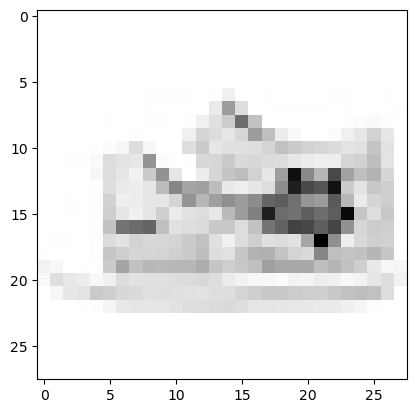

In [56]:
import matplotlib.pyplot as plt

# Labels for the classes
labels = [
    "T-shirt/top", 
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

# Iterate over test images
for i in range(len(test_data)):
    # Retrieve the test image and label
    image, label = test_data[i]

    # Display the test image
    plt.imshow(image.squeeze(), cmap="Greys")  # Remove the singleton dimension
#     plt.show()


    # Make the prediction
    with torch.no_grad():
        pred = simpleNN(image)  # Predict with simpleNN
        prediction = labels[pred.argmax().item()]  # Find the predicted label
        true_label = labels[label]  # True label

    # Print the prediction and true label
    print(f"Prediction: {prediction}")
    print(f"True label: {true_label}")
    print()


In [77]:
torch.save(simpleNN.state_dict(),'fashionmnist.pth')

In [78]:
simpleNN

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [79]:
simpleNN.load_state_dict(torch.load('fashionmnist.pth'))

<All keys matched successfully>

In [80]:
simpleNN.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [90]:
dummy_input=torch.randn(3,1,28,28)

In [91]:
onnx_filename="fashionmnist.onnx"

In [92]:
torch.onnx.export(model,dummy_input,onnx_filename)

============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



RuntimeError: Given groups=1, weight of size [12, 3, 3, 3], expected input[3, 1, 28, 28] to have 3 channels, but got 1 channels instead

In [93]:
import torch.onnx

# Set the model to evaluation mode
simpleNN.eval()

# Provide an example input tensor
example_input = torch.randn(1, 1, 28, 28)

# Specify the path to save the ONNX model
onnx_path = "convModel.onnx"

# Export the model to ONNX format
torch.onnx.export(simpleNN, example_input, onnx_path)

print("Model converted to ONNX successfully!")


============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

Model converted to ONNX successfully!


In [104]:
import onnxruntime

# Load the ONNX model
onnx_path = "convModel.onnx"
sess = onnxruntime.InferenceSession(onnx_path)


In [110]:
# Get a sample from the test data
sample_index = 0  # Choose the index of the sample you want to use
input_data = test_data[sample_index][0]  # Get the input tensor

# Add batch dimension to the input data
input_data = input_data.unsqueeze(0)

# Convert the input tensor to a numpy array
input_np = input_data.numpy()

# Convert the input data to a compatible format (optional)
input_name = sess.get_inputs()[0].name
input_data = {input_name: input_np}


In [111]:
output_name = sess.get_outputs()[0].name

# Run the inference
output = sess.run([output_name], input_data)

# Process the output
output_np = output[0]
predicted_label = np.argmax(output_np)

print("Predicted label:", predicted_label)


Predicted label: 9


In [117]:
import random

# Select a random index from the test dataset
random_index = random.randint(0, len(test_data) - 1)

# Get the input tensor
input_data = test_data[random_index][0]

# Add batch dimension to the input data
input_data = input_data.unsqueeze(0)

# Convert the input tensor to a numpy array
input_np = input_data.numpy()

# Convert the input data to a compatible format (optional)
input_name = sess.get_inputs()[0].name
input_data = {input_name: input_np}

# Run the inference
output = sess.run([output_name], input_data)

# Process the output
output_np = output[0]
predicted_label = np.argmax(output_np)

print("Randomly picked image index:", random_index)
print("Predicted label:", predicted_label)


Randomly picked image index: 2855
Predicted label: 2


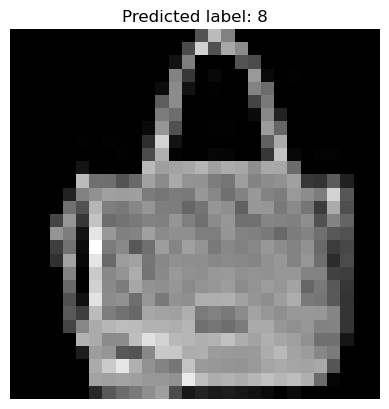

In [130]:
import matplotlib.pyplot as plt

# Select the index you want to predict
index = 2000

# Get the input tensor
input_data = test_data[index][0]

# Add batch dimension to the input data
input_data = input_data.unsqueeze(0)

# Convert the input tensor to a numpy array
input_np = input_data.numpy()

# Convert the input data to a compatible format (optional)
input_name = sess.get_inputs()[0].name
input_data = {input_name: input_np}

# Run the inference
output = sess.run([output_name], input_data)

# Process the output
output_np = output[0]
predicted_label = np.argmax(output_np)

# Get the corresponding image
image = test_data[index][0].numpy()

# Display the image and predicted label
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Predicted label: {}".format(predicted_label))
plt.axis("off")
plt.show()


In [103]:
(X_train, y_train), (X_test, y_test) = datasets.FashionMNIST(
    root      = "data",
    train     = True,       # for Training data
    download  = True,
    transform = ToTensor()  # for converting to tensor
    )


TypeError: MNIST.__init__() got an unexpected keyword argument 'test'

In [99]:
import onnxruntime
import numpy as np
import random

# Load the ONNX model
session = onnxruntime.InferenceSession("convModel.onnx")

# Get input and output information
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

# Select a random test image
test_img_number_onnx = random.randint(0, len(X_test) - 1)  # Adjusted to ensure it's within the valid range
test_img_onnx = X_test[test_img_number_onnx]

# Prepare the input image
test_img_input_onnx = np.expand_dims(test_img_onnx, 0).astype(np.float32) / 255.0  # Convert to float and normalize

# Get the ground truth label
ground_truth_onnx = np.argmax(y_test_cat[test_img_number_onnx])

# Run inference
result = session.run([output_name], {input_name: test_img_input_onnx})
predicted_class_onnx = np.argmax(result[0])  # Retrieve the result from the list and find the index of the maximum value


NameError: name 'X_test' is not defined

simpleNN predict as Ankle boot ; truth is Ankle boot


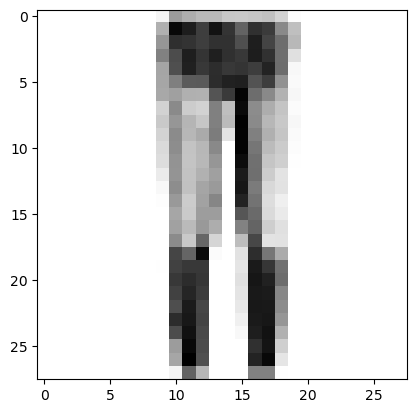

In [95]:
labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]


# very first Test image
plt.imshow(test_data.data[3], cmap = "Greys") # Ankle boot!
# pixel data
x = test_data[0][0] 
# true / correct label
y = test_data[0][1] 


# let's make prediction
with torch.no_grad():
    pred = simpleNN(x)                     # predict with simpleNN
    prediction = labels[pred[0].argmax(0)] # find predicted label
    truth      = labels[y]                 # true label
    
    print(f"simpleNN predict as {prediction} ; truth is {truth}")

In [22]:
class ConvNet(nn.Module):
    def __init__(self,num_classes=10):
        super(ConvNet,self).__init__()
        
        self.conv1=nn.Conv2d(in_channels=3,out_channels=12,kernel_size=3,stride=1,padding=1)
        self.bn1=nn.BatchNorm2d(num_features=12)
        self.relu1=nn.ReLU()
        self.pool=nn.MaxPool2d(kernel_size=2)
        
        self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
        self.bn2=nn.BatchNorm2d(num_features=20)
        self.relu2=nn.ReLU()
        
        self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
        self.bn3=nn.BatchNorm2d(num_features=32)
        self.relu3=nn.ReLU()
        
        self.fc=nn.Linear(in_features=75*75*32,out_features=num_classes)
        
    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)
        output=self.pool(output)
        output=self.conv2(output)
        output=self.bn2(output)
        output=self.relu2(output)
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)
        
        
        output=output.view(-1,32*75*75)
        output=self.fc(output)
        
        return output

In [24]:
model=ConvNet(num_classes=10)

In [32]:
optimizer=Adam(model.parameters(),lr=0.001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()

In [25]:
num_epochs=10
train_count=len(train_dataloader)
test_count=len(test_dataloader)

In [33]:
#Model training and saving best model

best_accuracy=0.0

for epoch in range(num_epochs):
    
    #Evaluation and training on training dataset
    model.train()
    train_accuracy=0.0
    train_loss=0.0
    
    for i, (images,labels) in enumerate(train_dataloader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
            
        optimizer.zero_grad()
        
        outputs=model(images)
        loss=loss_function(outputs,labels)
        loss.backward()
        optimizer.step()
        
        
        train_loss+= loss.cpu().data*images.size(0)
        _,prediction=torch.max(outputs.data,1)
        
        train_accuracy+=int(torch.sum(prediction==labels.data))
        
    train_accuracy=train_accuracy/train_count
    train_loss=train_loss/train_count
    
    
    # Evaluation on testing dataset
    model.eval()
    
    test_accuracy=0.0
    for i, (images,labels) in enumerate(test_dataloader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
            
        outputs=model(images)
        _,prediction=torch.max(outputs.data,1)
        test_accuracy+=int(torch.sum(prediction==labels.data))
    
    test_accuracy=test_accuracy/test_count
    
    
    print('Epoch: '+str(epoch)+' Train Loss: '+str(train_loss)+' Train Accuracy: '+str(train_accuracy)+' Test Accuracy: '+str(test_accuracy))
    
    #Save the best model
    if test_accuracy>best_accuracy:
        torch.save(model.state_dict(),'fmnist.pth')
        best_accuracy=test_accuracy

RuntimeError: Given groups=1, weight of size [12, 3, 3, 3], expected input[64, 1, 28, 28] to have 3 channels, but got 1 channels instead